In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## code for extracting feature information

In [2]:
data_info=pd.read_csv("lending_club_info.csv",index_col="LoanStatNew")

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]["Description"])
    

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


In [5]:
df=pd.read_csv("lending_club_loan_two.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# EXPLORATORY DATA ANALYSIS

In [8]:
#SINCE WE WILL BE PREDICTING LOAN STATUS LE US EXAMINE USING A COUNTPLOT

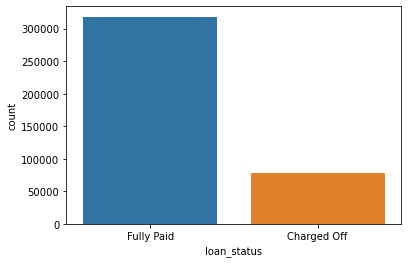

In [9]:
sns.countplot(x="loan_status",data=df)

In [10]:
#to check the correlation various features with one another lets plot a heatmap of correlations

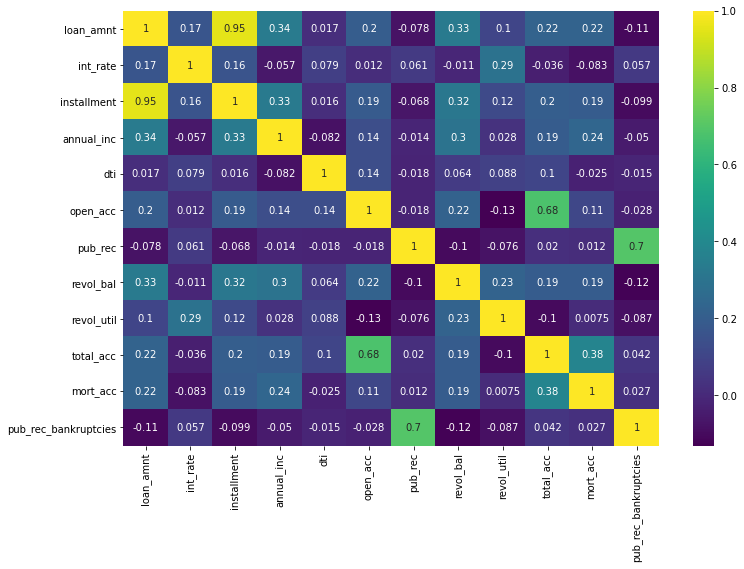

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [12]:
#we can see that there is very high correlation betweem loan_amnt and installment

In [13]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


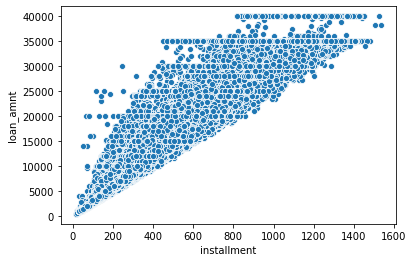

In [14]:
#lets see a scatterplot of loan amount with installment
sns.scatterplot(x="installment",y="loan_amnt",data=df)

In [15]:
#summary stats of loan amount grouped by loan status
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [16]:
#this shows that on average the charged off loans are higher that fully paid loans

In [17]:
#lets see if the grade feature is related to the loan_status feature by using a countplot

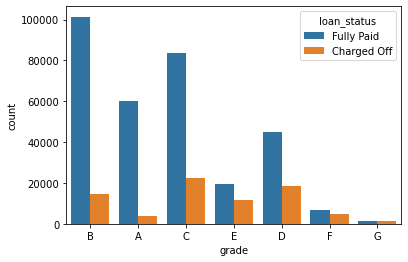

In [18]:
sns.countplot(x="grade",data=df,hue="loan_status")

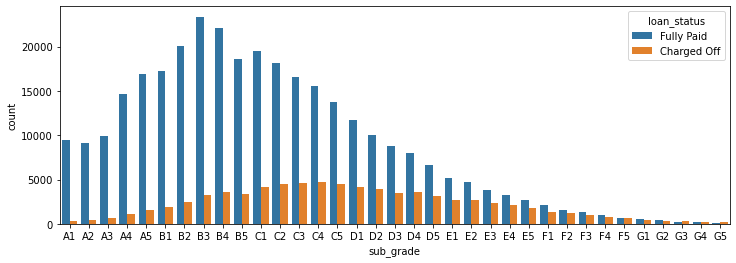

In [19]:
#lets see the countplot of subgrade with hue of loan status
plt.figure(figsize=(12,4))
sns.countplot(x="sub_grade",data=df,order=sorted(df["sub_grade"].unique()),hue="loan_status")

In [20]:
#now lets create a loan_repaid column by which will have a value of 1 if loan_status is fully paid and 0 if charged off
df["loan_repaid"]=df["loan_status"].map({"Fully Paid":1,"Charged Off":0})

In [21]:
df[["loan_status","loan_repaid"]]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


# MISSING DATA, REMOVING UNWANTED FEATURES

In [22]:
#lets check the missing values in each column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [23]:
#lets see in % of lenth of the datframe
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [24]:
#looks like 7 features have some missing data with mort_acc with approx 10% missing data
#so lets looks at each of these fetures one by one.

In [25]:
feat_info("emp_title")

The job title supplied by the Borrower when applying for the loan.*


In [26]:
df['emp_title'].value_counts()

Teacher                                   4389
Manager                                   4250
Registered Nurse                          1856
RN                                        1846
Supervisor                                1830
                                          ... 
truck dirver                                 1
TPO                                          1
Computer teacher                             1
tek tree llc                                 1
VA Medical Center/ Army National Guard       1
Name: emp_title, Length: 173105, dtype: int64

In [27]:
#thats too many titles , so its impossibe to convert them into dummy variables and then maybe try to adjust the missing values
#So lets drop emp_title
df=df.drop('emp_title',axis=1)

In [28]:
#lets look at emp_length
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

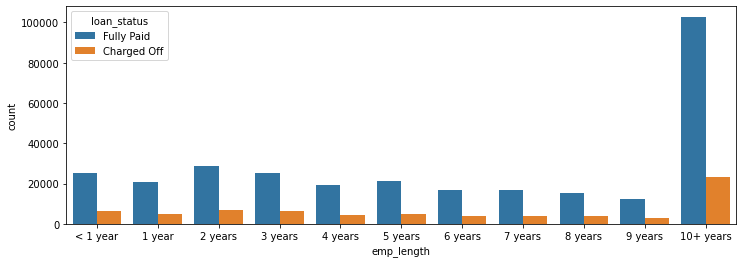

In [29]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

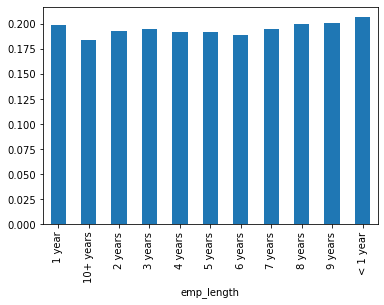

In [30]:
#what percent of people per employment category didn't pay back their loan.
df_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
df_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
perc=df_co/(df_co+df_fp)
perc.plot(kind='bar')

In [31]:
#since there is not muchh differnce 
#so drop this feature
df=df.drop('emp_length',axis=1)

In [32]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [33]:
df['title'].value_counts()

Debt consolidation                   152472
Credit card refinancing               51487
Home improvement                      15264
Other                                 12930
Debt Consolidation                    11608
                                      ...  
undergrad                                 1
Sewer Repair and Taxes                    1
Much needed, long coming vacation         1
Debt & Legal Fees                         1
Chevron LOC Payoff Loan                   1
Name: title, Length: 48817, dtype: int64

In [34]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [35]:
#since they both are same so lets drop the title column
df=df.drop('title',axis=1)

# FILLING IN MISSING DATA

In [36]:
feat_info('mort_acc')

Number of mortgage accounts.


In [37]:
#to fill the values lests check the feature which has the highest correlation with the mortgage acc
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [38]:
#total acc is highly correlated , so lets fill the missing values with help from this
#mean of mort acc column as per total acc
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [39]:
mean_of_mort_acc_as_per_total_acc=df.groupby('total_acc').mean()['mort_acc']

In [40]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mean_of_mort_acc_as_per_total_acc[total_acc]
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [41]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [42]:
#NOW LLETS DROP OFF THE REST OF NULL VALUES SINCE THEY VERY FEW AS COMPARED TO THE DATA

In [43]:
df=df.dropna()

In [44]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# categorical variable, dummy variables, one-hot encoding

In [45]:
#lets see which features have data  in the form of string
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [46]:
#so there are 12 features with object datatype , lets look at them one at a time
#term
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [47]:
df['term']=df['term'].apply(lambda term: int(term[:3]))          

In [48]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [49]:
#drop the grade column since sub grade and grade both serve the same purpose
df=df.drop('grade',axis=1)

# convert all the categorical data into dummy variables

In [50]:
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose','sub_grade']],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose','sub_grade'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [51]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3'

In [52]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   home_ownership                       395219 non-null  object 
 5   annual_inc                           395219 non-null  float64
 6   issue_d                              395219 non-null  object 
 7   loan_status                          395219 non-null  object 
 8   dti                                  395219 non-null  float64
 9   earliest_cr_line                     395219 non-null  object 
 10  open_acc                             395219 non-null  float64
 11  pub_rec      

# loan_status

In [54]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [55]:
#drop loan_status
df=df.drop('loan_status',axis=1)

In [56]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

# home_ownership

In [57]:
# replace NONE and ANY with OTHER
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

# address

In [58]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

# issue_d

In [59]:
#to prevent data leakage
df=df.drop('issue_d',axis=1)

# earliest_cr_line  

In [60]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [63]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [64]:
df=df.drop('earliest_cr_line',axis=1)

In [65]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

# train test split

In [66]:
from sklearn.model_selection import train_test_split
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values


In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

# scaling and normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [71]:
X_train.shape

(316175, 78)

# creating the model

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Activation
from tensorflow.keras.constraints import max_norm

In [80]:
model1=Sequential()
model1.add(Dense(units=78,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=39,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=19,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam')

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

Train on 316175 samples, validate on 79044 samples
Epoch 1/40
316175/316175 [==============================] - 4s 11us/sample - loss: 0.3466 - val_loss: 0.2691
Epoch 2/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2773 - val_loss: 0.2652
Epoch 3/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2701 - val_loss: 0.2656
Epoch 4/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2676 - val_loss: 0.2641
Epoch 5/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2668 - val_loss: 0.2637
Epoch 6/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2659 - val_loss: 0.2640
Epoch 7/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2656 - val_loss: 0.2640
Epoch 8/40
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2651 - val_loss: 0.2643
Epoch 9/40
316175/316175 [==============================] - 3s 10us/sample - 

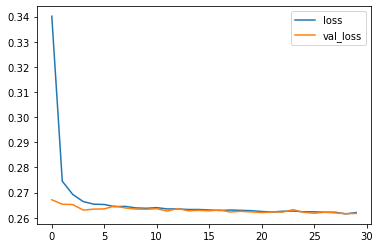

In [82]:

model1.fit(x=X_train,y=y_train,epochs=40,batch_size=256,callbacks=[early_stop],verbose=1,validation_data=(X_test,y_test))
model1_loss=pd.DataFrame(model.history.history)
model1_loss.plot()

In [83]:
#model1.save('loan_dataset.h5')

# evaluating model performance

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
predictions=model1.predict_classes(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6739  8919]
 [   11 63375]]


In [86]:
# random guess will give accuracy of 50%
# a straight guess will give accuacy of 80% sice our data is unbalanced
# we got an accuracy of 89% which is not bad

# given a new customer, would i offer this person a loan

In [105]:
import random


random_index=random.randint(0,len(df))
random_customer=df.drop('loan_repaid',axis=1).iloc[random_index]
random_customer=scaler.transform(random_customer.values.reshape(1,78))
model1.predict_classes(random_customer)

array([[1]])

In [106]:
df.iloc[random_index]['loan_repaid']

1.0